# Simple Linear Regression

Objective: to predict the score a student would obtain based on the number of hours that student studies for.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: load the data
url = "https://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


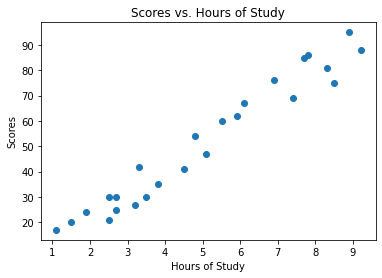

In [3]:
# Step 2: Explore data to see if it's a good fit for linear regression
plt.scatter(x="Hours", y="Scores", data=s_data)
plt.title("Scores vs. Hours of Study")
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

Data fits linear regression. We are good to go!

In [4]:
# Step 3: Split data into input and output, and further into training and testing sets

# Step 3.1 - Split data into input and output
# we have to reshape the data as the model used for simple and multi linear regression is the same
# and the model expects the input to be multi-dimensional.
# without reshape, the dimension will be (25,). With reshape, we will get (25,1)
# in other words, we need to explicitly define the number of columns, even if it's only one column
x = s_data.iloc[:,0].values.reshape(-1,1) # reshape(-1,1) ==> add another dimension into the input
y = s_data.iloc[:,1].values

In [5]:
# Step 3.2 - Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [6]:
# Step 4: Train the linear regression algorithm
from sklearn.linear_model import LinearRegression

# Instantiatee (create an instance) of the algorithm
regressor = LinearRegression()

# Train the model
regressor.fit(x_train, y_train)

LinearRegression()

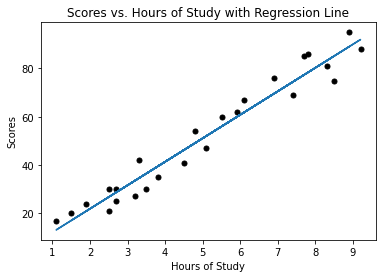

In [7]:
# Step 5: Visualize the trained model
line = regressor.coef_ * x + regressor.intercept_ # y = mx + c

plt.scatter(x="Hours", y="Scores", data=s_data, c="black", s=25)
plt.plot(x, line)
plt.title("Scores vs. Hours of Study with Regression Line")
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

In [8]:
# Step 6: Test the Model
# Test the model with the testing data (x_test) that we kept inside

y_pred = regressor.predict(x_test)

compare_df = pd.DataFrame({"Hours (Testing)":x_test.reshape(-1), "Desired Output (Actual)":y_test,
                            "Model Output (Predicted)": y_pred})
compare_df

,Hours (Testing),Desired Output (Actual),Model Output (Predicted)
0,2.5,30,26.754247
1,8.9,95,89.061827
2,5.1,47,52.066701
3,4.8,54,49.146033
4,8.3,81,83.220491


In [9]:
# Step 7: Evaluate the Model
# Step 7.1 - Mean Absolute Error
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)

print("The Mean Absolute Error = ", MAE)

The Mean Absolute Error =  4.2650170627080595


In [10]:
# Step 7.2 - (Root) Mean Squared Error
MSE = metrics.mean_squared_error(y_test, y_pred)

print("The Mean Squared Error = ", MSE)
print("The Root Mean Squared Error = ", np.sqrt(MSE))

The Mean Squared Error =  19.991969747382687
The Root Mean Squared Error =  4.471238055324575


In [11]:
# Step 8: Do your own predictions

own_pred = regressor.predict([[8]])

print("My Score should be = ", own_pred)

unbounded_pred = regressor.predict([[40]])

print("My Ling-Ling 40h Score should be = ", unbounded_pred)

My Score should be =  [80.29982332]
My Ling-Ling 40h Score should be =  [391.83772258]


Limitation: Linear Regression Model is an unbounded model. Hence, in order to bound the result to within reasonable means (e.g. the unbounded_pred above), we can only do a logic-based/condition-based boundary (i.e. if-else condition).